In [20]:
import librosa
from librosa import display


In [21]:

import os
import pandas as pd
import glob 
from tqdm import tqdm


In [22]:
import librosa
from librosa import display

data, sampling_rate = librosa.load('./Data_16kb/03-01-01-01-01-01-01.wav')


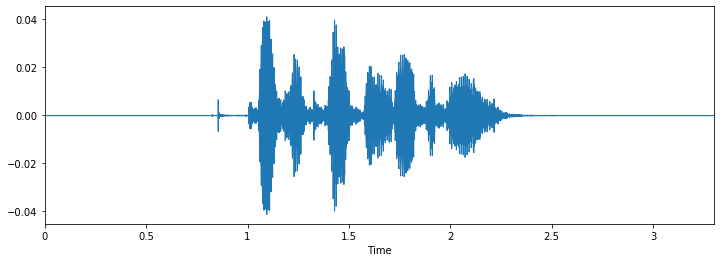

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import glob 

plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

In [28]:
#Loading saved models
import joblib

X = joblib.load('./features/X.joblib')
X = np.reshape(X,(1442,1024,256))
y = joblib.load('./features/y.joblib')

(1442, 1, 1024, 256)


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [31]:

import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(Conv1D(128, 5,padding='same',
                 input_shape=(1024,256)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.00005, rho=0.9, decay=0.0)


With *model.summary* we can see a recap of what we have build:

In [32]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 1024, 128)         163968    
_________________________________________________________________
activation_4 (Activation)    (None, 1024, 128)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024, 128)         0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 128, 128)          0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 128, 128)          82048     
_________________________________________________________________
activation_5 (Activation)    (None, 128, 128)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 128, 128)         

Now we can compile and fit our model:

In [33]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [34]:
cnnhistory=model.fit(X_train, y_train, batch_size=16, epochs=1000, validation_data=(X_test, y_test))

Train on 966 samples, validate on 476 samples
Epoch 1/1000
966/966 [==============================] - 12s 12ms/step - loss: 2.1258 - accuracy: 0.1718 - val_loss: 2.0081 - val_accuracy: 0.2143
Epoch 2/1000
966/966 [==============================] - 8s 8ms/step - loss: 1.9045 - accuracy: 0.2847 - val_loss: 2.0138 - val_accuracy: 0.2227
Epoch 3/1000
966/966 [==============================] - 9s 9ms/step - loss: 1.7968 - accuracy: 0.3344 - val_loss: 1.9210 - val_accuracy: 0.2794
Epoch 4/1000
966/966 [==============================] - 9s 9ms/step - loss: 1.7103 - accuracy: 0.3872 - val_loss: 1.9233 - val_accuracy: 0.2605
Epoch 5/1000
966/966 [==============================] - 9s 9ms/step - loss: 1.6026 - accuracy: 0.4400 - val_loss: 1.8801 - val_accuracy: 0.3004
Epoch 6/1000
966/966 [==============================] - 9s 9ms/step - loss: 1.5109 - accuracy: 0.4607 - val_loss: 1.8988 - val_accuracy: 0.2815
Epoch 7/1000
966/966 [==============================] - 9s 9ms/step - loss: 1.4174 - acc

KeyboardInterrupt: 

Let's plot the loss:

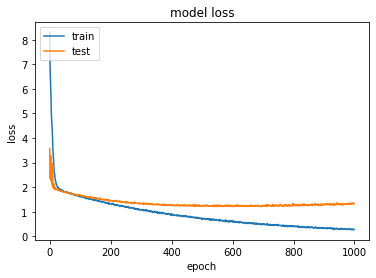

In [27]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



And now let's plot the accuracy:

In [ ]:
plt.plot(cnnhistory.history['acc'])
plt.plot(cnnhistory.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
predictions = model.predict_classes(x_testcnn)

In [ ]:
predictions

In [ ]:
y_test

In [ ]:
new_Ytest = y_test.astype(int)

In [ ]:
new_Ytest

Okay, now we can display the classification report:

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(new_Ytest, predictions)
print(report)

And now, the confusion matrix: it will show us the misclassified samples

In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(new_Ytest, predictions)
print (matrix)

# 0 = neutral, 1 = calm, 2 = happy, 3 = sad, 4 = angry, 5 = fearful, 6 = disgust, 7 = surprised

# Save the model

In [ ]:
model_name = 'Emotion_Voice_Detection_Model.h5'
save_dir = '/content/drive/My Drive/Ravdess_model'
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Reloading the model to test it

In [ ]:
loaded_model = keras.models.load_model('/content/drive/My Drive/Ravdess_model/Emotion_Voice_Detection_Model.h5')
loaded_model.summary()

# Checking the accuracy of the loaded model

In [ ]:
loss, acc = loaded_model.evaluate(x_testcnn, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

# Thank you for your attention! To be continued..